In [1]:
# -*- coding: utf-8 -*-

import os
import sys
import xlrd
from copy import deepcopy
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 图片设置
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# 解决中文显示问题
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
# 列显示
pd.set_option('display.max_columns', 1000)

##    ** 数据最全的站点 **

In [2]:
data_dir = './hourly_data'
# 中国环境监测总站, 数据较全
jczz = os.path.join(data_dir, '110000012.txt')

In [3]:
data = pd.read_csv(
    jczz, 
    sep=',', 
    names=[
        'time','stationcode','longitude','latitude',
        'PM10','PM25',
        'Cl-','NO3-','SO42-','Ca2+','Na+','K+','NH4+','Mg2+',
        'OC','EC',
        'Hg','Br','As','Si','Se','Te','V','Ca','Ti','Ba','Sc',
        'Pd','Co','Mo','K','Fe','Pb','TI','Cu','Cr','Cs','Ag',
        'Zn','Sb','Sn','Mn','Cd','Ni','Ga'],
    encoding='utf-8')

In [4]:
data.head()

,time,stationcode,longitude,latitude,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+,OC,EC,Hg,Br,As,Si,Se,Te,V,Ca,Ti,Ba,Sc,Pd,Co,Mo,K,Fe,Pb,TI,Cu,Cr,Cs,Ag,Zn,Sb,Sn,Mn,Cd,Ni,Ga
0,2019-01-01:00,110000012,116.426,40.048,97.92,66.830,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.525,-999.000,-999.0,-999.000,-999.000,-999.000,-999.000,-999.0,-999.0,-999.000,-999.000,-999.000,-999.000,-999.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-999.0,-999.000,-999.0,-999.0,-999.000,NaN,NaN,NaN
1,2019-01-01:01,110000012,116.426,40.048,95.92,59.340,4.777,7.389,0.101,0.190,0.495,0.770,7.297,0.034,8.569,2.035,-999.0,24.363,2.447,582.994,9.484,-999.0,-999.0,532.644,24.715,66.903,1.146,-999.0,10.852,84.933,826.137,756.589,81.246,4.575,135.414,15.796,11.278,-999.0,243.554,-999.0,-999.0,85.677,-999.0,15.792,10.030
2,2019-01-01:02,110000012,116.426,40.048,78.62,51.570,3.188,7.599,0.075,0.177,0.422,0.583,6.282,0.032,6.164,1.269,-999.0,24.815,5.972,769.016,11.844,-999.0,-999.0,771.753,30.422,93.461,2.479,-999.0,3.585,26.758,918.143,838.080,86.893,-999.000,47.587,12.914,7.485,-999.0,244.243,-999.0,-999.0,60.340,-999.0,-999.000,9.985
3,2019-01-01:03,110000012,116.426,40.048,95.27,44.566,3.130,7.335,2.560,0.167,0.410,0.505,6.277,0.033,6.397,1.177,-999.0,21.289,6.292,384.104,8.320,-999.0,-999.0,558.127,7.224,63.813,1.148,-999.0,3.077,107.964,527.728,596.601,53.350,-999.000,149.217,9.557,9.622,-999.0,214.838,-999.0,-999.0,80.626,-999.0,10.716,6.285
4,2019-01-01:04,110000012,116.426,40.048,86.61,51.520,2.687,7.723,2.679,0.178,0.419,0.501,6.190,0.033,6.365,1.330,-999.0,15.307,4.559,536.331,2.958,-999.0,-999.0,503.740,19.501,56.452,5.633,-999.0,8.779,61.430,555.248,569.188,59.979,-999.000,84.185,7.431,2.613,-999.0,182.973,-999.0,-999.0,63.164,-999.0,-999.000,5.983


In [5]:
# -999.0 表示无效记录，但至少有记录表示，有些时间段是完全没有记录的
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 45 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         8760 non-null   object 
 1   stationcode  8760 non-null   int64  
 2   longitude    8760 non-null   float64
 3   latitude     8760 non-null   float64
 4   PM10         8760 non-null   float64
 5   PM25         8760 non-null   float64
 6   Cl-          8760 non-null   float64
 7   NO3-         8760 non-null   float64
 8   SO42-        8760 non-null   float64
 9   Ca2+         8760 non-null   float64
 10  Na+          8760 non-null   float64
 11  K+           8760 non-null   float64
 12  NH4+         8760 non-null   float64
 13  Mg2+         8760 non-null   float64
 14  OC           8760 non-null   float64
 15  EC           8760 non-null   float64
 16  Hg           8760 non-null   float64
 17  Br           8760 non-null   float64
 18  As           8760 non-null   float64
 19  Si    

In [5]:
data.replace(-999.0, np.nan).sample(5)

,time,stationcode,longitude,latitude,PM10,PM25,Cl-,NO3-,SO42-,Ca2+,Na+,K+,NH4+,Mg2+,OC,EC,Hg,Br,As,Si,Se,Te,V,Ca,Ti,Ba,Sc,Pd,Co,Mo,K,Fe,Pb,TI,Cu,Cr,Cs,Ag,Zn,Sb,Sn,Mn,Cd,Ni,Ga
8197,2019-12-08:13,110000012,116.426,40.048,113.10,159.580,13.720,35.551,25.269,0.151,0.623,1.468,26.741,0.023,14.879,3.711,NaN,67.576,11.837,958.365,16.794,NaN,NaN,538.179,41.291,42.885,2.963,NaN,NaN,11.318,1395.358,1467.717,107.265,NaN,81.042,19.389,9.217,NaN,373.872,NaN,NaN,163.690,NaN,6.385,10.051
1160,2019-02-18:08,110000012,116.426,40.048,42.35,17.705,0.936,3.470,1.014,0.680,0.218,0.130,1.471,0.050,2.086,1.744,0.470,12.244,NaN,228.907,1.405,NaN,1.427,76.486,10.483,28.139,NaN,NaN,10.183,NaN,234.923,97.599,26.355,7.720,NaN,NaN,NaN,NaN,2.853,NaN,NaN,NaN,NaN,NaN,16.599
10,2019-01-01:10,110000012,116.426,40.048,106.95,49.640,1.205,6.860,3.204,0.080,0.406,0.586,5.264,0.020,2.670,2.394,NaN,19.149,4.544,334.386,12.060,NaN,NaN,305.209,NaN,27.464,3.561,NaN,3.628,107.893,890.734,479.631,108.848,1.514,164.508,23.132,11.559,NaN,270.144,NaN,NaN,179.219,NaN,11.303,5.576
6384,2019-09-24:00,110000012,116.426,40.048,58.22,20.370,0.100,1.640,3.500,0.049,0.337,0.140,2.180,0.040,3.856,0.489,1.054,7.624,NaN,348.865,NaN,NaN,NaN,240.280,17.506,38.600,1.446,3.199,0.965,18.478,168.962,533.658,21.352,4.760,62.070,8.718,NaN,NaN,20.768,22.806,NaN,35.439,NaN,NaN,1.013
6511,2019-09-29:07,110000012,116.426,40.048,42.81,61.020,0.240,21.000,9.620,0.043,0.437,0.430,12.167,0.030,7.405,1.103,0.680,16.617,0.295,393.733,6.187,NaN,0.356,150.367,16.057,27.260,0.593,NaN,3.610,59.897,365.426,617.484,32.087,4.503,71.003,3.106,2.627,NaN,83.678,76.332,21.273,55.515,NaN,12.958,0.742


+ 先进行组分分类，分别关联PM10，PM25以便后期分析
+ 第一步预处理，替换无效值

In [6]:
# OCEC
obs_ocec = data[['time', 'PM10', 'PM25', 'OC', 'EC']]
obs_ocec.replace(-999.0, np.nan, inplace=True)
obs_ocec['time'] = obs_ocec['time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d:%H"))
obs_ocec.sample(3)

,time,PM10,PM25,OC,EC
6019,2019-09-08 19:00:00,40.72,16.34,4.648,0.651
8162,2019-12-07 02:00:00,80.79,51.51,4.466,1.060
4252,2019-06-27 04:00:00,37.51,44.57,3.021,0.803


In [7]:
obs_ocec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    8760 non-null   datetime64[ns]
 1   PM10    8704 non-null   float64       
 2   PM25    8705 non-null   float64       
 3   OC      8642 non-null   float64       
 4   EC      8636 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 342.3 KB


+ 看下数据的统计分布

In [8]:
obs_ocec.describe(percentiles=[.7, .8, .9, .95]).T

,count,mean,std,min,50%,70%,80%,90%,95%,max
PM10,8704.0,68.939290,65.321860,0.007,47.615,73.5240,100.5220,149.0900,193.9730,916.600
PM25,8705.0,45.263637,40.918336,0.039,32.940,51.4480,65.6600,91.6400,128.6880,425.020
OC,8642.0,10.195370,518.160490,0.040,3.854,5.4611,6.4476,8.2075,10.1998,48171.970
EC,8636.0,1.987401,65.838018,0.010,0.914,1.3780,1.7480,2.4770,3.4600,6118.159


In [13]:
obs_ocec.index

RangeIndex(start=0, stop=8760, step=1)

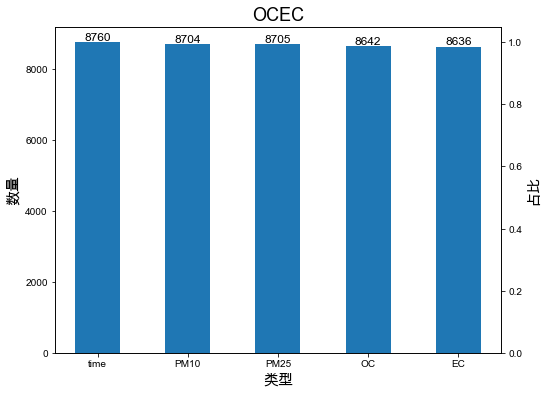

In [23]:
# 数据完整性
fig, ax = plt.subplots(figsize=(8, 6))

pm10_num = obs_ocec['PM10'].notna().sum()
pm25_num = obs_ocec['PM25'].notna().sum()
oc_num = obs_ocec['OC'].notna().sum()
ec_num = obs_ocec['EC'].notna().sum()
total = obs_ocec['time'].notna().sum()

ax.bar(obs_ocec.columns, [total, pm10_num, pm25_num, oc_num, ec_num], width=0.5)
ax.set_xlabel('类型', fontsize=15)
ax2 = ax.twinx()
ax2.bar(obs_ocec.columns[:], [1, pm10_num/total, pm25_num/total, oc_num/total, ec_num/total], width=0.2)

for x,y in zip(obs_ocec.columns, [total, pm10_num, pm25_num, oc_num, ec_num]):
    ax.text(x, y+0.005, '%d' % y, ha='center', va='bottom', fontsize=12)
ax.set_ylabel('数量', fontsize=15)
ax2.set_ylabel('占比', fontsize=15)
ax.set_title('OCEC', fontsize=18)

plt.show()

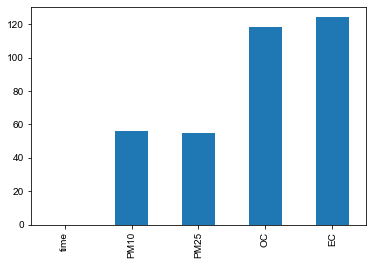

In [9]:
obs_ocec[obs_ocec.columns].isna().sum().plot(kind='bar')

In [10]:
# miss obs
obs_ocec1 = obs_ocec[obs_ocec.isnull().values==True].drop_duplicates()
obs_ocec1.sample(3)

,time,PM10,PM25,OC,EC
4176,2019-06-24 00:00:00,34.65,34.60,NaN,0.17
360,2019-01-16 00:00:00,51.30,25.07,1.44,NaN
8656,2019-12-27 16:00:00,85.22,31.45,NaN,NaN


In [11]:
# dropna : clean data
obs_ocec0 = obs_ocec.dropna()
# OC/PM25       ----->  OC/PM2.5>30%认为数据可能有异常
obs_ocec0['oc/pm25'] = obs_ocec0['OC'] / obs_ocec0['PM25']
# EC/PM25       ----->  EC/PM2.5>20%认为数据可能有异常
obs_ocec0['ec/pm25'] = obs_ocec0['EC'] / obs_ocec0['PM25']
# (OC+EC)/PM25  ----->  OC+EC/PM2.5>50%认为数据可能有异常  
obs_ocec0['ocec/pm25'] = (obs_ocec0['OC'] + obs_ocec0['EC']) / obs_ocec0['PM25']
# OC/EC         ----->  OC/EC 比值一般在 0.6-10 之间，如出现该范围外的结果则为异常数据，
#                       需结合数据浓度连续性等特征进一步判断该数据是否有效。
obs_ocec0['oc/ec'] = obs_ocec0['OC'] / obs_ocec0['EC']
obs_ocec0.sample(5)

,time,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec
1078,2019-02-14 22:00:00,75.84,52.940,5.635,0.950,0.106441,0.017945,0.124386,5.931579
8584,2019-12-24 16:00:00,47.62,56.600,4.736,0.848,0.083675,0.014982,0.098657,5.584906
4740,2019-07-17 12:00:00,31.09,58.020,3.343,1.621,0.057618,0.027939,0.085557,2.062307
493,2019-01-21 13:00:00,39.75,18.921,1.208,1.091,0.063844,0.057661,0.121505,1.107241
5915,2019-09-04 11:00:00,70.04,63.720,6.170,2.060,0.096830,0.032329,0.129159,2.995146


In [12]:
obs_ocec0.describe(percentiles=[.05, .1, .8, .85, .9, .95, .97, .99])

,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec
count,8583.000000,8583.000000,8583.000000,8583.000000,8583.000000,8583.000000,8583.000000,8583.000000
mean,68.871765,45.334546,10.227934,1.994792,0.488306,0.082334,0.570640,4.724572
std,65.520722,40.981893,519.936839,66.040908,32.702307,4.157273,36.856863,2.801153
min,0.007000,0.039000,0.040000,0.010000,0.000816,0.000666,0.003467,0.166667
5%,12.551000,9.491000,1.096400,0.230000,0.046671,0.009911,0.065042,1.203337
10%,18.150000,12.370000,1.355200,0.287000,0.058786,0.012650,0.079423,1.586516
50%,47.430000,32.950000,3.860000,0.915000,0.110442,0.026792,0.141794,4.427640
80%,100.428000,65.736000,6.451600,1.752600,0.160160,0.044839,0.198405,6.306906
85%,119.517000,75.967000,7.140700,2.046700,0.174645,0.050517,0.214325,6.817113
90%,149.152000,91.672000,8.211600,2.482800,0.197793,0.058787,0.239045,7.617373


In [13]:
obs_ocec0.sample()

,time,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec
7,2019-01-01 07:00:00,91.82,49.51,7.021,1.488,0.14181,0.030055,0.171864,4.718414


In [17]:
bad_df = obs_ocec0.loc[(obs_ocec0['time']>'2019-02-20')&(obs_ocec0['time']<'2019-02-28')]
bad_df

,time,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec
1201,2019-02-20 01:00:00,36.23,21.970,1.426,0.940,0.064907,0.042786,0.107692,1.517021
1202,2019-02-20 02:00:00,48.08,18.822,1.430,0.709,0.075975,0.037669,0.113644,2.016925
1203,2019-02-20 03:00:00,30.69,16.549,1.225,0.880,0.074023,0.053175,0.127198,1.392045
1204,2019-02-20 04:00:00,23.32,19.360,1.186,0.891,0.061260,0.046023,0.107283,1.331089
1205,2019-02-20 05:00:00,28.01,18.810,1.173,0.820,0.062360,0.043594,0.105954,1.430488
...,...,...,...,...,...,...,...,...,...
1387,2019-02-27 19:00:00,148.28,113.750,8.293,2.521,0.072905,0.022163,0.095068,3.289568
1388,2019-02-27 20:00:00,174.42,111.130,8.803,2.256,0.079214,0.020301,0.099514,3.902039
1389,2019-02-27 21:00:00,156.67,105.140,9.622,2.312,0.091516,0.021990,0.113506,4.161765
1390,2019-02-27 22:00:00,176.95,108.320,9.166,2.453,0.084620,0.022646,0.107266,3.736649


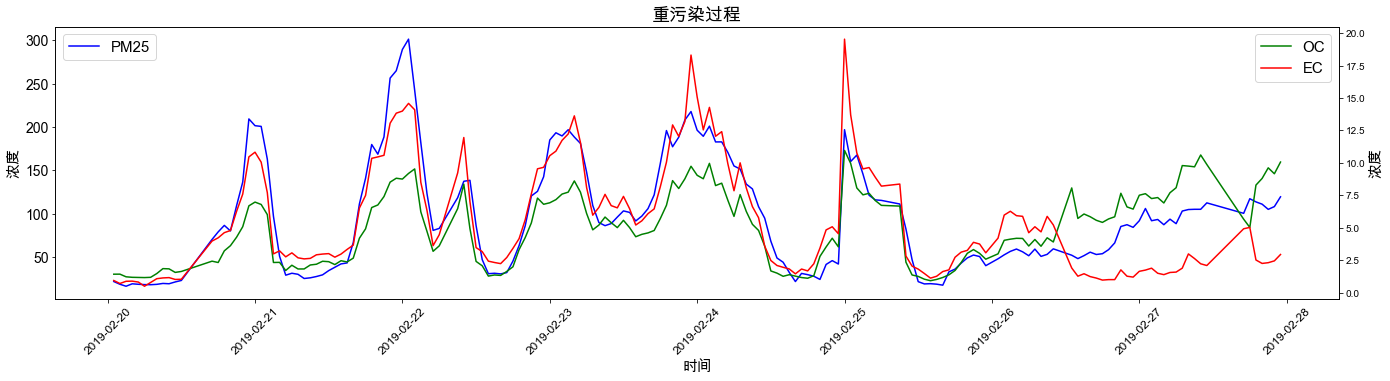

In [23]:
fig, ax = plt.subplots(figsize=(23, 5))

ax.plot(bad_df['time'], bad_df['PM25'], color='b', label='PM25')
ax1 = ax.twinx()
ax1.plot(bad_df['time'], bad_df['OC'], color='g', label='OC')
ax1.plot(bad_df['time'], bad_df['EC'], color='r', label='EC')

ax.set_xlabel('时间', fontsize=15)
ax.set_ylabel('浓度', fontsize=15)
ax1.set_ylabel('浓度', fontsize=15)
# ticks
ax.xaxis.set_tick_params(rotation=45, labelsize=12)
xstart, xend = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(xstart, xend, 10))
ax.yaxis.set_tick_params(labelsize=14)
ax.set_title('重污染过程',fontsize=18)
# legennd
ax.legend(fontsize=15, loc='upper left')
ax1.legend(fontsize=15, loc='upper right')
plt.show()

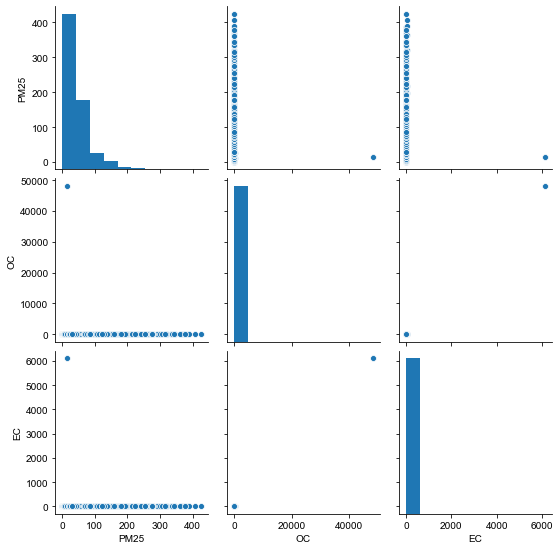

In [225]:
sns.pairplot(obs_ocec0[['PM25', 'OC', 'EC']])

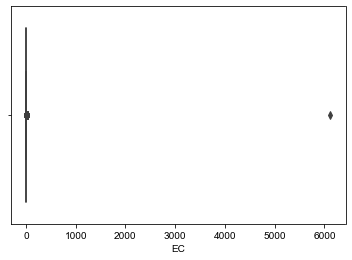

In [37]:
sns.boxplot(x=obs_ocec['EC'], data=obs_ocec0)

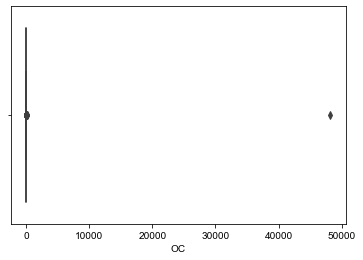

In [38]:
sns.boxplot(x=obs_ocec['OC'], data=obs_ocec0)

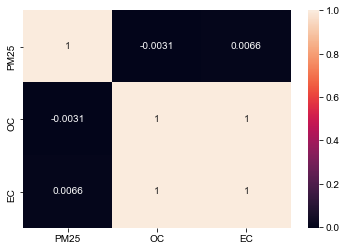

In [226]:
sns.heatmap(obs_ocec0[['PM25', 'OC', 'EC']].corr(), annot=True)

In [47]:
def plot_scatter(df):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.scatter(df['OC'], df['EC'], marker='.', color='b')
    ax.set_xlabel('OC', fontsize=15)
    ax.set_ylabel('EC', fontsize=15)
    plt.show()

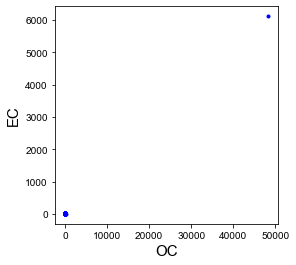

In [48]:
plot_scatter(obs_ocec0)

### 剔除极高值、异常值

In [41]:
obs_ocec0.describe(percentiles=[.8, .85, .9, .95, .97, .99])

,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec
count,8583.000000,8583.000000,8583.000000,8583.000000,8583.000000,8583.000000,8583.000000,8583.000000
mean,68.871765,45.334546,10.227934,1.994792,0.488306,0.082334,0.570640,4.724572
std,65.520722,40.981893,519.936839,66.040908,32.702307,4.157273,36.856863,2.801153
min,0.007000,0.039000,0.040000,0.010000,0.000816,0.000666,0.003467,0.166667
50%,47.430000,32.950000,3.860000,0.915000,0.110442,0.026792,0.141794,4.427640
80%,100.428000,65.736000,6.451600,1.752600,0.160160,0.044839,0.198405,6.306906
85%,119.517000,75.967000,7.140700,2.046700,0.174645,0.050517,0.214325,6.817113
90%,149.152000,91.672000,8.211600,2.482800,0.197793,0.058787,0.239045,7.617373
95%,194.317000,128.901000,10.199600,3.466900,0.247447,0.073531,0.294184,8.943691
97%,229.643200,147.670800,12.205620,4.460640,0.287893,0.084069,0.349394,9.997490


In [43]:
oc_baseline = obs_ocec0[obs_ocec0['oc/pm25']<=0.3]
oc_baseline.shape

(8357, 9)

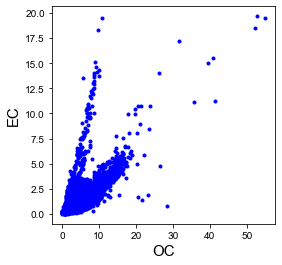

In [49]:
plot_scatter(oc_baseline)

In [44]:
ec_baseline = obs_ocec0[obs_ocec0['ec/pm25']<=0.2]
ec_baseline.shape

(8557, 9)

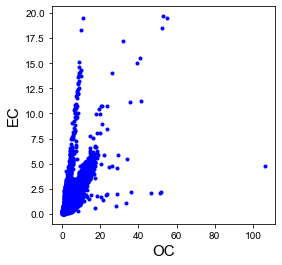

In [50]:
plot_scatter(ec_baseline)

In [52]:
ocec_pm25_baseline = obs_ocec0[obs_ocec0['ocec/pm25']<=0.5]
ocec_pm25_baseline.shape

(8495, 9)

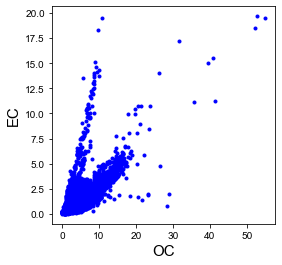

In [53]:
plot_scatter(ocec_pm25_baseline)

In [86]:
obs_ocec0[obs_ocec0['OC']==obs_ocec0['OC'].max()]

,time,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec
8643,2019-12-27 03:00:00,44.02,15.9,48171.97,6118.159,3029.683648,384.789874,3414.473522,7.873605


In [55]:
ocec_baseline = obs_ocec0[(obs_ocec0['oc/ec']>=0.6)&(obs_ocec0['oc/ec']<=10)]
ocec_baseline.shape

(8303, 9)

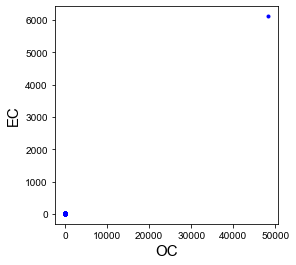

In [56]:
plot_scatter(ocec_baseline)

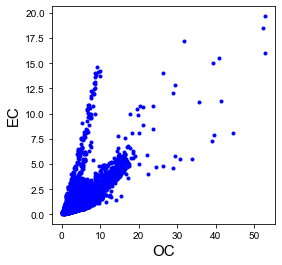

In [227]:
plot_scatter(train_ocec[(train_ocec['oc/ec']>=0.6)&(train_ocec['oc/ec']<=10)])

In [57]:
strict_ocec = obs_ocec0[
    (obs_ocec0['oc/pm25']<=0.3) & 
    (obs_ocec0['ec/pm25']<=0.2) & 
    (obs_ocec0['ocec/pm25']<=0.5) & 
    ((obs_ocec0['oc/ec']>=0.6)&(obs_ocec0['oc/ec']<=10))
]
strict_ocec.shape

(8111, 9)

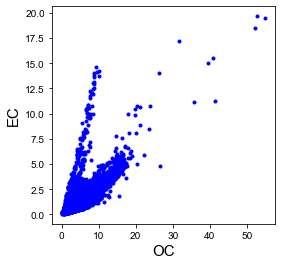

In [58]:
plot_scatter(strict_ocec)

In [59]:
strict_ocec.sample(5)

,time,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec
1334,2019-02-25 14:00:00,40.63,19.510,0.924,1.122,0.047360,0.057509,0.104869,0.823529
4041,2019-06-18 09:00:00,35.65,64.930,4.451,0.633,0.068551,0.009749,0.078300,7.031596
1976,2019-03-24 08:00:00,108.01,38.948,5.760,2.559,0.147889,0.065703,0.213592,2.250879
6386,2019-09-24 02:00:00,35.15,17.030,2.610,0.390,0.153259,0.022901,0.176160,6.692308
3801,2019-06-08 09:00:00,32.72,50.810,4.208,0.593,0.082818,0.011671,0.094489,7.096121


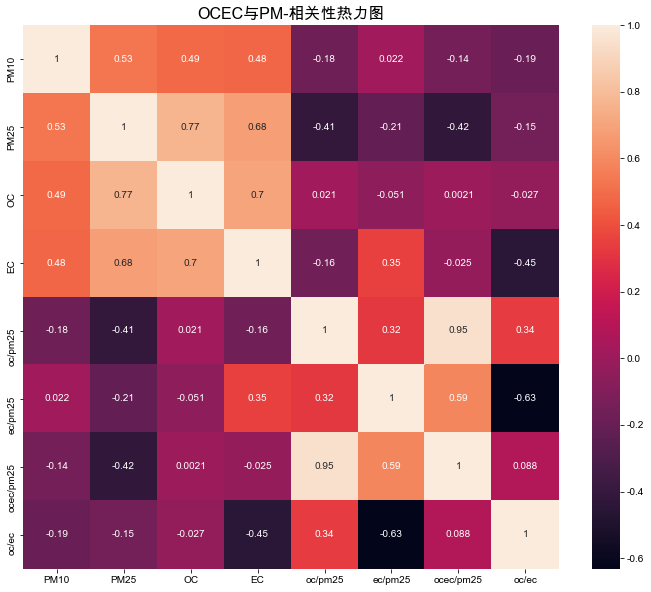

In [223]:
plt.figure(figsize=(12, 10))
sns.heatmap(strict_ocec.corr(), annot=True)
plt.title('OCEC与PM-相关性热力图', fontsize=16)
plt.savefig('../DataVisual/images/OCEC与PM-相关性热力图.png')
plt.show()

+ oc/pm25 与 ocec/pm25 的相关性达到0.95，在EC缺数的情况下是否可用于数据补充的方式？
+ 

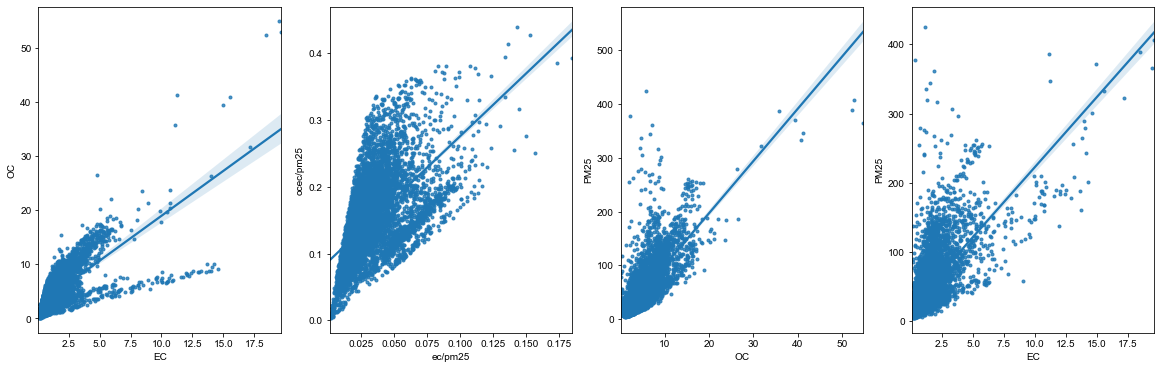

In [84]:
fig, axes=plt.subplots(1, 4, figsize=(20, 6))

sns.regplot(x='EC', y='OC', data=strict_ocec, ax=axes[0], marker='.')
sns.regplot(x='ec/pm25', y='ocec/pm25', data=strict_ocec, ax=axes[1], marker='.')
sns.regplot(x='OC', y='PM25', data=strict_ocec, ax=axes[2], marker='.')
sns.regplot(x='EC', y='PM25', data=strict_ocec, ax=axes[3], marker='.')

In [260]:
def plot_line(df, title):
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.plot(df['time'], df['OC'], color=color, label='OC(μg/m3)')
    ax.plot(df['time'], df['EC'], color=color, label='EC(μg/m3)')
    
    ax.set_xlabel('时间', fontsize=15)
    ax.set_ylabel('浓度', fontsize=15)
    ax.set_title(title, fontsize=18)

    ax.xaxis.set_tick_params(rotation=50, labelsize=12)
    xstart, xend = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(xstart, xend, 10))
    ax.yaxis.set_tick_params(labelsize=14)
    ax.legend(fontsize=15)
    plt.show()

### 剔除极高值作为原始的训练数据

In [117]:
train_ocec = obs_ocec0.drop(index=obs_ocec0.nlargest(6, 'OC').index)

In [118]:
train_ocec.nlargest(6, 'OC')

,time,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec
289,2019-01-13 01:00:00,428.02,406.71,52.822,19.669,0.129876,0.048361,0.178238,2.685546
4700,2019-07-15 20:00:00,46.98,63.40,52.745,16.044,0.831940,0.253060,1.085000,3.287522
290,2019-01-13 02:00:00,416.31,389.29,52.245,18.467,0.134206,0.047438,0.181644,2.829101
617,2019-01-26 17:00:00,61.82,43.91,52.040,2.230,1.185151,0.050786,1.235937,23.336323
616,2019-01-26 16:00:00,58.26,39.16,51.360,2.110,1.311542,0.053882,1.365424,24.341232
615,2019-01-26 15:00:00,49.49,30.79,46.540,2.060,1.511530,0.066905,1.578435,22.592233


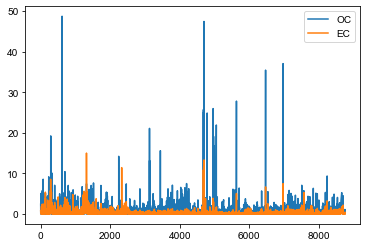

In [273]:
abs(train_ocec[['OC','EC']].diff()).plot()

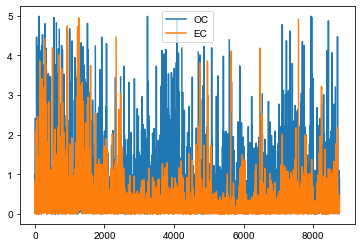

In [275]:
train_diff = train_ocec[['OC','EC']].diff()
abs(train_diff[abs(train_diff[['OC', 'EC']])<5]).plot()

In [274]:
abs(train_ocec[['OC','EC']].diff()).describe(percentiles=[.05, .1, .2, .3, .4, .5, .8, .9, .95, .99])

,OC,EC
count,8576.000000,8576.000000
mean,0.710479,0.288621
std,1.802334,0.596424
min,0.000000,0.000000
5%,0.030000,0.012750
10%,0.057000,0.025000
20%,0.116000,0.050000
30%,0.186500,0.080000
40%,0.260000,0.113000
50%,0.353000,0.150000


In [261]:
plot_line(train_ocec, '原始OCEC')

NameError: name 'color' is not defined

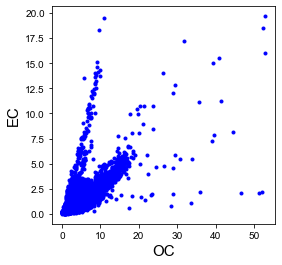

In [120]:
逐小时# 剔除最大的六个数据
plot_scatter(train_ocec)

In [107]:
strict_ocec.nlargest(5, 'OC')

,time,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec
286,2019-01-12 22:00:00,372.57,365.46,54.823,19.509,0.150011,0.053382,0.203393,2.810139
289,2019-01-13 01:00:00,428.02,406.71,52.822,19.669,0.129876,0.048361,0.178238,2.685546
290,2019-01-13 02:00:00,416.31,389.29,52.245,18.467,0.134206,0.047438,0.181644,2.829101
291,2019-01-13 03:00:00,398.36,346.83,41.320,11.250,0.119136,0.032437,0.151573,3.672889
287,2019-01-12 23:00:00,415.55,333.17,40.860,15.551,0.122640,0.046676,0.169316,2.627484


---

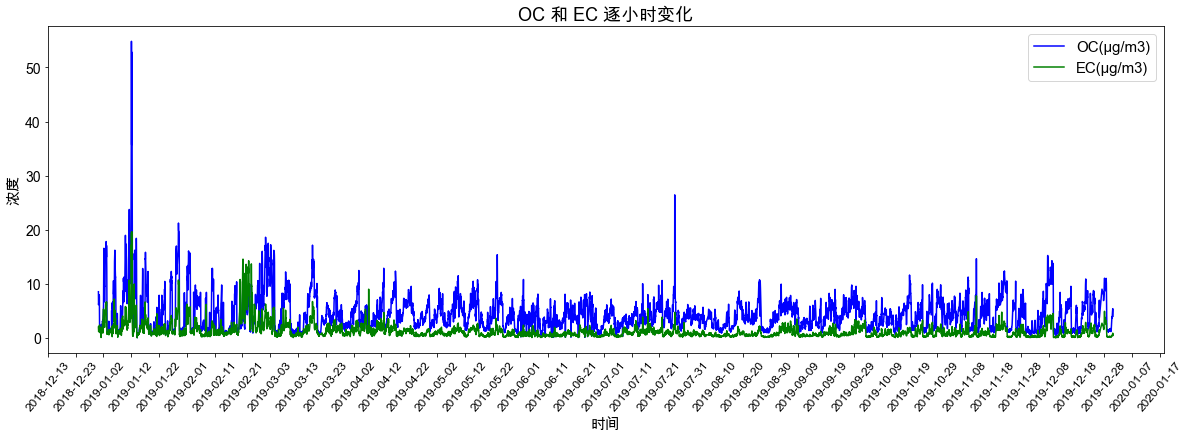

In [101]:
plot_line(strict_ocec)

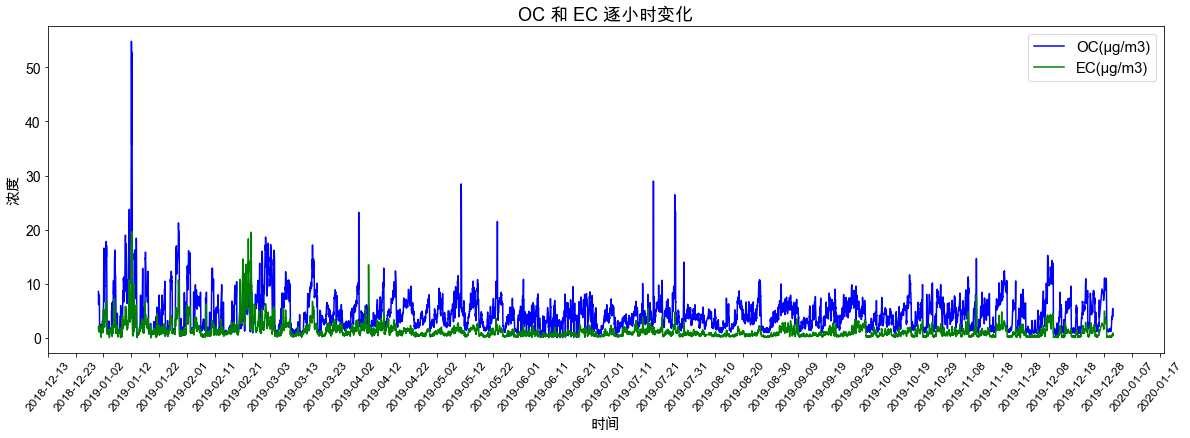

In [97]:
# 变化df参数
plot_line(ocec_pm25_baseline)

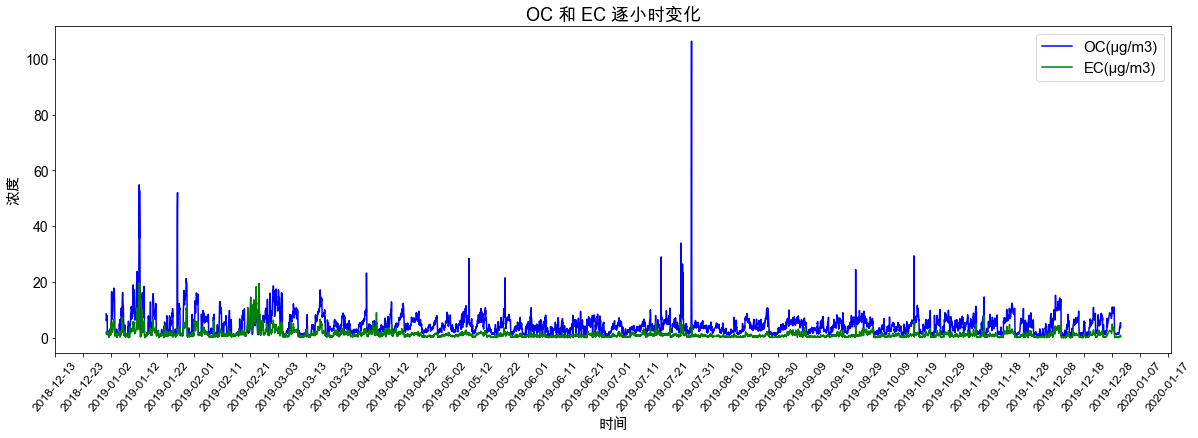

In [100]:
plot_line(ec_baseline)

In [77]:
# patay 方式建立线性模型
import past
from patsy import dmatrices

y, X = dmatrices('y ~ x', strict_ocec[['EC', 'OC']].rename(
    columns={'EC': 'x', 'OC': 'y'}))
# Patsy对象可以直接传递到算法（比如numpy.linalg.lstsq）中，它执行普通最小二乘回归
coef, resid, _, _ = np.linalg.lstsq(X, y, rcond=-1)
# 模型的元数据保留在design_info属性中，因此你可以重新附加列名到拟合系数
coef = pd.Series(coef.squeeze(), index=X.design_info.column_names)
coef

Intercept    2.387841
x            1.656476
dtype: float64

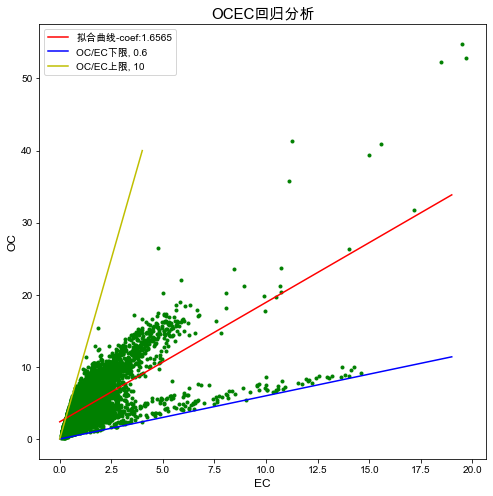

In [228]:
# 可视化结果
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(strict_ocec['EC'], strict_ocec['OC'], color='g', marker='.')
ax.plot(
    np.arange(0, strict_ocec['EC'].max()), 
    coef.x*np.arange(0, strict_ocec['EC'].max())+coef.Intercept,
    color='r', label='拟合曲线-coef:{}'.format(round(coef.x, 4)))
ax.plot(np.arange(0, 20), 0.6*np.arange(0, 20), color='b', label='OC/EC下限, 0.6')
ax.plot(np.arange(0, 5), 10*np.arange(0, 5), color='y', label='OC/EC上限, 10')

ax.set_title('OCEC回归分析', fontsize=15)
ax.set_xlabel('EC', fontsize=12)
ax.set_ylabel('OC', fontsize=12)
plt.legend()
plt.savefig('../DataVisual/images/OCEC回归分析.png')
plt.show()

## 思路一：基于以上划分的数据，进行label，进行监督学习

In [152]:
# 仅剔除了异常高值和缺失的数据
train_set = deepcopy(train_ocec)
# 0: normal
# 1: outlier
for i in train_set.index:
    if i in strict_ocec.index:
        train_set.loc[train_set.index==i, 'label'] = 0
    else:
        train_set.loc[train_set.index==i, 'label'] = 1

In [153]:
train_set.groupby('label').count()

,time,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec
label,,,,,,,,,
0.0,8110,8110,8110,8110,8110,8110,8110,8110,8110
1.0,467,467,467,467,467,467,467,467,467


In [163]:
# 划分数据集
from sklearn.model_selection import train_test_split

X, y = train_set[train_set.columns[1:-1]], train_set[['label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [170]:
# 利用非线性模型
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf_svc = SVC(kernel='rbf')
clf_mnb = MultinomialNB(alpha=1.0)
clf_knn = KNeighborsClassifier(n_neighbors=5)

In [204]:
clf_svc.fit(X_train, y_train)
clf_svc.score(X_test, y_test)

0.946969696969697

In [171]:
clf_mnb.fit(X_train, y_train)
clf_mnb.score(X_test, y_test)

0.8892773892773893

In [172]:
clf_knn.fit(X_train, y_train)
clf_knn.score(X_test, y_test)

0.9597902097902098

## 测试数据 -- 验证机器学习算法

In [191]:
test_file = os.path.join(data_dir, '430100001.txt')
test_data = pd.read_csv(
    test_file, 
    sep=',', 
    names=[
        'time','stationcode','longitude','latitude',
        'PM10','PM25',
        'Cl-','NO3-','SO42-','Ca2+','Na+','K+','NH4+','Mg2+',
        'OC','EC',
        'Hg','Br','As','Si','Se','Te','V','Ca','Ti','Ba','Sc',
        'Pd','Co','Mo','K','Fe','Pb','TI','Cu','Cr','Cs','Ag',
        'Zn','Sb','Sn','Mn','Cd','Ni','Ga'],
    encoding='utf-8')
test_ocec = test_data[['time', 'PM10', 'PM25', 'OC', 'EC']]
test_ocec.replace(-999.0, np.nan, inplace=True)
test_ocec['time'] = test_ocec['time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d:%H"))

In [193]:
test_ocec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    8760 non-null   datetime64[ns]
 1   PM10    2857 non-null   float64       
 2   PM25    2856 non-null   float64       
 3   OC      2745 non-null   float64       
 4   EC      2730 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 342.3 KB


In [194]:
test_ocec0 = test_ocec.dropna()
test_ocec0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 5881 to 8759
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2664 non-null   datetime64[ns]
 1   PM10    2664 non-null   float64       
 2   PM25    2664 non-null   float64       
 3   OC      2664 non-null   float64       
 4   EC      2664 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 124.9 KB


In [195]:
# 计算特征项
def clean(obs_ocec0):
    # OC/PM25       ----->  OC/PM2.5>30%认为数据可能有异常
    obs_ocec0['oc/pm25'] = obs_ocec0['OC'] / obs_ocec0['PM25']
    # EC/PM25       ----->  EC/PM2.5>20%认为数据可能有异常
    obs_ocec0['ec/pm25'] = obs_ocec0['EC'] / obs_ocec0['PM25']
    # (OC+EC)/PM25  ----->  OC+EC/PM2.5>50%认为数据可能有异常  
    obs_ocec0['ocec/pm25'] = (obs_ocec0['OC'] + obs_ocec0['EC']) / obs_ocec0['PM25']
    # OC/EC         ----->  OC/EC 比值一般在 0.6-10 之间，如出现该范围外的结果则为异常数据，
    #                       需结合数据浓度连续性等特征进一步判断该数据是否有效。
    obs_ocec0['oc/ec'] = obs_ocec0['OC'] / obs_ocec0['EC']
    # obs_ocec0.sample(5)
    return obs_ocec0

In [215]:
test_ocec0 = clean(test_ocec0)
test_ocec0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 5881 to 8759
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       2664 non-null   datetime64[ns]
 1   PM10       2664 non-null   float64       
 2   PM25       2664 non-null   float64       
 3   OC         2664 non-null   float64       
 4   EC         2664 non-null   float64       
 5   oc/pm25    2664 non-null   float64       
 6   ec/pm25    2664 non-null   float64       
 7   ocec/pm25  2664 non-null   float64       
 8   oc/ec      2664 non-null   float64       
 9   label      2664 non-null   float64       
 10  label_svm  2664 non-null   float64       
 11  label_knn  2664 non-null   float64       
 12  label_mnb  2664 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 371.4 KB


In [251]:
test_ocec0.describe(percentiles=[.1, .8, .85, .9, .95, .97, .99])

,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec,label,label_svm,label_knn,label_mnb
count,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000
mean,88.040878,56.960173,9.433806,2.240792,0.183503,0.048843,0.232346,4.963571,0.123874,0.003378,0.009384,0.084835
std,50.101999,35.971643,5.865098,1.607262,0.088510,0.057518,0.134152,2.957706,0.329499,0.058036,0.096436,0.278688
min,0.500000,2.900000,0.770000,0.040000,0.011383,0.000697,0.012234,0.538462,0.000000,0.000000,0.000000,0.000000
10%,32.700000,21.600000,3.406000,0.840000,0.092934,0.018615,0.120290,2.418839,0.000000,0.000000,0.000000,0.000000
50%,79.050000,48.300000,8.010000,1.715000,0.167168,0.037539,0.207093,4.317211,0.000000,0.000000,0.000000,0.000000
80%,124.700000,81.140000,13.214000,3.390000,0.242055,0.057772,0.293392,6.374096,0.000000,0.000000,0.000000,0.000000
85%,137.000000,90.510000,15.791000,3.880000,0.262500,0.064306,0.318035,6.945581,0.000000,0.000000,0.000000,0.000000
90%,156.700000,103.000000,18.047000,4.457000,0.282453,0.075759,0.349238,7.946695,1.000000,0.000000,0.000000,0.000000
95%,185.685000,127.685000,21.612500,5.180000,0.329731,0.107387,0.421744,10.158920,1.000000,0.000000,0.000000,1.000000


In [200]:
def clf_line(obs_ocec0):
    strict_ocec = obs_ocec0[
        (obs_ocec0['oc/pm25']<=0.3) & 
        (obs_ocec0['ec/pm25']<=0.2) & 
        (obs_ocec0['ocec/pm25']<=0.5) & 
        ((obs_ocec0['oc/ec']>=0.6)&(obs_ocec0['oc/ec']<=10))
    ]
    
    return strict_ocec

In [216]:
# 按总站要求划分
test_strict = clf_line(test_ocec0)
test_strict

,time,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec,label,label_svm,label_knn,label_mnb
5881,2019-09-03 01:00:00,60.6,37.1,2.16,0.95,0.058221,0.025606,0.083827,2.273684,0.0,0.0,0.0,0.0
5882,2019-09-03 02:00:00,64.2,37.3,2.16,0.95,0.057909,0.025469,0.083378,2.273684,0.0,0.0,0.0,0.0
5883,2019-09-03 03:00:00,58.3,34.5,2.16,0.95,0.062609,0.027536,0.090145,2.273684,0.0,0.0,0.0,0.0
5884,2019-09-03 04:00:00,54.3,33.4,2.16,0.95,0.064671,0.028443,0.093114,2.273684,0.0,0.0,0.0,0.0
5885,2019-09-03 05:00:00,48.3,33.8,2.16,0.95,0.063905,0.028107,0.092012,2.273684,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,124.0,75.6,6.98,2.00,0.092328,0.026455,0.118783,3.490000,0.0,0.0,0.0,0.0
8756,2019-12-31 20:00:00,117.9,75.2,7.21,2.57,0.095878,0.034176,0.130053,2.805447,0.0,0.0,0.0,0.0
8757,2019-12-31 21:00:00,118.8,74.8,7.67,2.33,0.102540,0.031150,0.133690,3.291845,0.0,0.0,0.0,0.0
8758,2019-12-31 22:00:00,116.9,70.0,6.77,1.96,0.096714,0.028000,0.124714,3.454082,0.0,0.0,0.0,0.0


In [217]:
for i in test_ocec0.index:
    if i in test_strict.index:
        test_ocec0.loc[test_ocec0.index==i, 'label'] = 0
    else:
        test_ocec0.loc[test_ocec0.index==i, 'label'] = 1

In [218]:
test_ocec0

,time,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec,label,label_svm,label_knn,label_mnb
5881,2019-09-03 01:00:00,60.6,37.1,2.16,0.95,0.058221,0.025606,0.083827,2.273684,0.0,0.0,0.0,0.0
5882,2019-09-03 02:00:00,64.2,37.3,2.16,0.95,0.057909,0.025469,0.083378,2.273684,0.0,0.0,0.0,0.0
5883,2019-09-03 03:00:00,58.3,34.5,2.16,0.95,0.062609,0.027536,0.090145,2.273684,0.0,0.0,0.0,0.0
5884,2019-09-03 04:00:00,54.3,33.4,2.16,0.95,0.064671,0.028443,0.093114,2.273684,0.0,0.0,0.0,0.0
5885,2019-09-03 05:00:00,48.3,33.8,2.16,0.95,0.063905,0.028107,0.092012,2.273684,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,124.0,75.6,6.98,2.00,0.092328,0.026455,0.118783,3.490000,0.0,0.0,0.0,0.0
8756,2019-12-31 20:00:00,117.9,75.2,7.21,2.57,0.095878,0.034176,0.130053,2.805447,0.0,0.0,0.0,0.0
8757,2019-12-31 21:00:00,118.8,74.8,7.67,2.33,0.102540,0.031150,0.133690,3.291845,0.0,0.0,0.0,0.0
8758,2019-12-31 22:00:00,116.9,70.0,6.77,1.96,0.096714,0.028000,0.124714,3.454082,0.0,0.0,0.0,0.0


In [208]:
print(classification_report(test_ocec0['label'], clf_svc.predict(test_ocec0[test_ocec0.columns[1:-1]])))

precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      2334
         1.0       1.00      0.03      0.05       330

    accuracy                           0.88      2664
   macro avg       0.94      0.51      0.49      2664
weighted avg       0.89      0.88      0.83      2664



In [211]:
print(classification_report(test_ocec0['label'], clf_knn.predict(test_ocec0[test_ocec0.columns[1:-1]])))

precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      2334
         1.0       1.00      0.08      0.14       330

    accuracy                           0.89      2664
   macro avg       0.94      0.54      0.54      2664
weighted avg       0.90      0.89      0.84      2664



In [212]:
print(classification_report(test_ocec0['label'], clf_mnb.predict(test_ocec0[test_ocec0.columns[1:-1]])))

precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2334
         1.0       0.63      0.43      0.51       330

    accuracy                           0.90      2664
   macro avg       0.78      0.70      0.73      2664
weighted avg       0.89      0.90      0.89      2664



In [214]:
test_ocec0['label_svm'] = clf_svc.predict(test_ocec0[test_ocec0.columns[1:-1]])
test_ocec0['label_knn'] = clf_knn.predict(test_ocec0[test_ocec0.columns[1:-2]])
test_ocec0['label_mnb'] = clf_mnb.predict(test_ocec0[test_ocec0.columns[1:-3]])

ValueError: X.shape[1] = 11 should be equal to 8, the number of features at training time

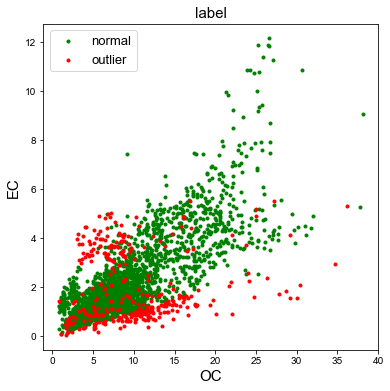

In [210]:
_plot_scatter(test_ocec0, 'label')

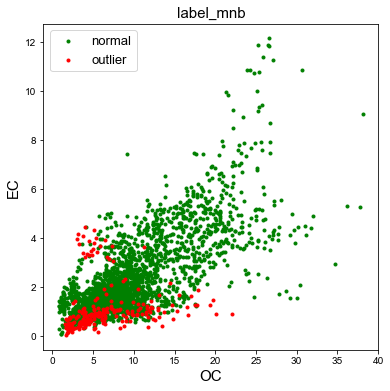

In [221]:
_plot_scatter(test_ocec0, 'label_mnb')

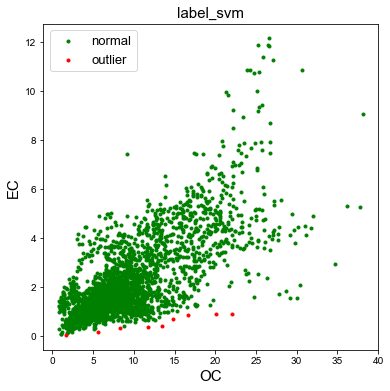

In [247]:
_plot_scatter(test_ocec0, 'label_svm')

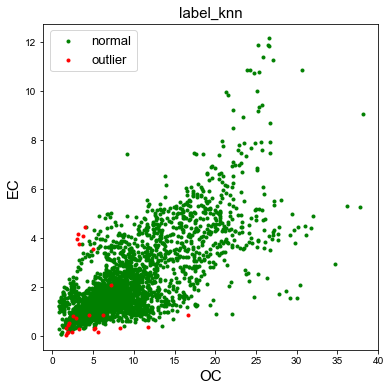

In [248]:
_plot_scatter(test_ocec0, 'label_knn')

## 思路二：基于聚类的无监督学习

In [231]:
# Define outlier detection tools to be compared

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF   # 基于聚类的局部异常因子
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.ocsvm import OCSVM
from pyod.models.lof import LOF

outliers_fraction = 0.05
random_state = np.random.RandomState(42)

In [232]:
classifiers = {
    'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
    'Cluster-based Local Outlier Factor (CBLOF)': CBLOF(contamination=outliers_fraction, 
        check_estimator=False, random_state=random_state),
    'Feature Bagging': FeatureBagging(
        LOF(n_neighbors=35), 
        contamination=outliers_fraction,
        check_estimator=False,
        random_state=random_state),
    'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
    'Isolation Forest (IF)': IForest(contamination=outliers_fraction,random_state=random_state),
    # 'K Nearest Neighbors': KNN(contamination=outliers_fraction),
    'Average KNN': KNN(method='mean',contamination=outliers_fraction),
    'PCA': PCA(svd_solver='auto'),
    'OCSVM': OCSVM(kernel='rbf', degree=4),
    'LOF': LOF()}

In [233]:
# 多个算法模型的评估
X = deepcopy(train_ocec[['OC', 'EC']])
# X1 = deepcopy(clean_ocec[['OC(μg/m3)', 'EC(μg/m3)', 'OC/EC']])

for i, (clf_name, clf) in enumerate(classifiers.items()):
    print('{}.\tfitting:\t{}'.format(i+1, clf_name))
    clf.fit(X)
    # clf.fit(X1)
    X[clf_name] = clf.labels_
    # X1[clf_name] = clf.labels_
    # scores_pred = clf.decision_function(X) * -1
    # y_pred = clf.predict(X)
    # threshold = np.percentile(scores_pred, 100 * outliers_fraction)

1.	fitting:	Angle-based Outlier Detector (ABOD)
2.	fitting:	Cluster-based Local Outlier Factor (CBLOF)
3.	fitting:	Feature Bagging
4.	fitting:	Histogram-base Outlier Detection (HBOS)
5.	fitting:	Isolation Forest (IF)
6.	fitting:	Average KNN
7.	fitting:	PCA
8.	fitting:	OCSVM
9.	fitting:	LOF


In [234]:
X.sample(5)

,OC,EC,Angle-based Outlier Detector (ABOD),Cluster-based Local Outlier Factor (CBLOF),Feature Bagging,Histogram-base Outlier Detection (HBOS),Isolation Forest (IF),Average KNN,PCA,OCSVM,LOF
8541,4.700,0.710,0,0,0,0,0,0,0,0,0
8335,1.032,0.192,0,0,0,0,0,0,0,0,0
6561,5.812,2.792,0,0,0,0,0,0,0,0,1
2417,4.200,2.741,0,0,0,0,0,0,0,0,0
3840,0.120,0.280,0,0,0,0,0,0,0,0,0


In [245]:
X['ensemble'] = X[X.columns[2:]].apply(lambda x: x.sum(), axis=1)
X['ensemble'] = [1 if x > 4 else 0 for x in X['ensemble']]

In [123]:
# 散点图可视化
def _plot_scatter(df, label: str):
    '''
    Function:
        可视化OC、EC二维分布，根据不同算法label进行区别
    Input:
        df: data;
        label: target column;
    Return:
        No return, show figure.

    ****** 慎选marker标记，可视化效果太影响模型的效果了，一般最好:. > * > o
    '''
    fig, ax = plt.subplots(figsize=(6, 6))

    ax.scatter(df[df[label]==0]['OC'], df[df[label]==0]['EC'], color='g', marker='.', label='normal')
    ax.scatter(df[df[label]==1]['OC'], df[df[label]==1]['EC'], color='r', marker='.', label='outlier')
    ax.set_xlabel('OC', fontsize=15)
    ax.set_ylabel('EC', fontsize=15)
    plt.title(label, fontsize=15)
    plt.legend(fontsize=13)
    plt.show()

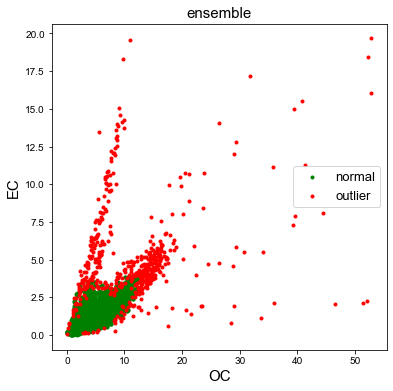

In [246]:
_plot_scatter(X, 'ensemble')

In [257]:
train_ocec.describe()

,PM10,PM25,OC,EC,oc/pm25,ec/pm25,ocec/pm25,oc/ec
count,8577.000000,8577.000000,8577.000000,8577.000000,8577.000000,8577.000000,8577.000000,8577.000000
mean,68.857173,45.313095,4.552549,1.277799,0.131846,0.037350,0.169196,4.716885
std,65.455217,40.844478,3.543624,1.419498,0.261213,0.188377,0.439154,2.779705
min,0.007000,0.039000,0.040000,0.010000,0.000816,0.000666,0.003467,0.166667
25%,29.400000,18.290000,2.200000,0.497000,0.080119,0.018158,0.106486,3.188350
50%,47.460000,32.970000,3.859000,0.915000,0.110388,0.026779,0.141709,4.427269
75%,85.030000,57.390000,5.940000,1.552000,0.148871,0.040353,0.185834,5.845985
max,916.600000,425.020000,52.822000,19.669000,18.205128,11.538462,29.743590,90.600000


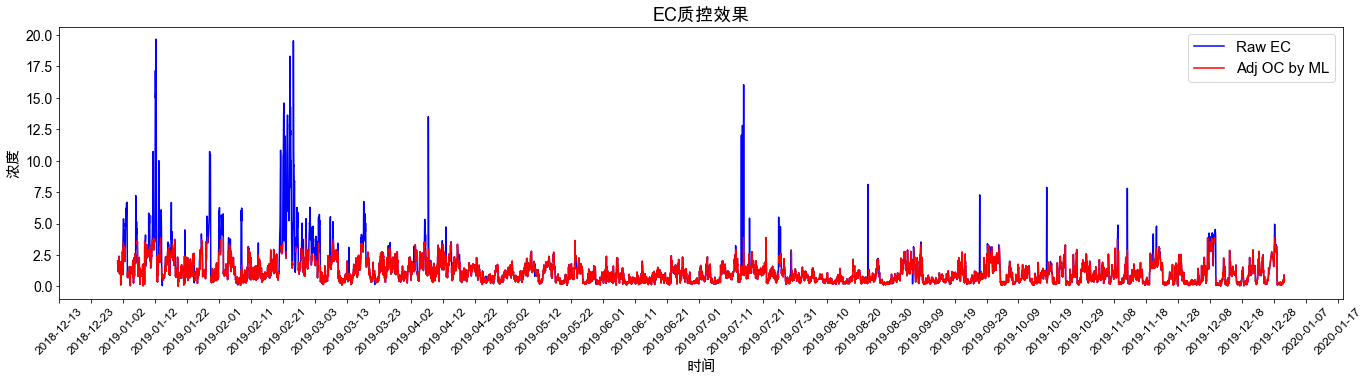

In [272]:
fig, ax = plt.subplots(figsize=(23, 5))

ax.plot(train_ocec['time'], train_ocec['EC'], color='b', label='Raw EC')
tmp0 = deepcopy(train_ocec)
tmp0.loc[tmp0['oc/pm25']>0.3, 'OC'] = np.nan
# tmp0.loc[tmp0['ec/pm25']>0.2, 'OC'] = np.nan
tmp0.loc[tmp0['ocec/pm25']>0.5, 'OC'] = np.nan
# tmp1 = deepcopy(train_ocec)
# tmp1.loc[tmp1['ocec/pm25']>0.5, 'OC'] = np.nan
# ax.plot(tmp0['time'], tmp0['OC'], color='g', label='Adj OC')
# ax.plot(tmp1['time'], tmp1['OC'], color='r', label='Adj EC by OCEC/PM25<0.5')
tt = deepcopy(X)
tt['time'] = train_ocec['time']
tt.loc[tt['ensemble']==1, 'EC'] = np.nan
ax.plot(tt['time'], tt['EC'], color='r', label='Adj OC by ML')

ax.set_xlabel('时间', fontsize=15)
ax.set_ylabel('浓度', fontsize=15)
# ticks
ax.xaxis.set_tick_params(rotation=45, labelsize=12)
xstart, xend = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(xstart, xend, 10))
ax.yaxis.set_tick_params(labelsize=14)
ax.set_title('EC质控效果',fontsize=18)
# legennd
ax.legend(fontsize=15)
plt.show()